In [1]:
%load_ext autoreload
%autoreload
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
import os

from record_data import Landmark

In [3]:
# CONSTANTS
DATASET_PATH = "./landmarks_pose_data"
LANDMARK_COORDS_SIZE = 21
SEED = 16

In [4]:
def load_data(root_path):
    class_files = os.listdir(root_path)
    frames = []
    columns = ["_x", "_y", "_z"] * LANDMARK_COORDS_SIZE
    columns = [str(idx // 3) + col for idx, col in enumerate(columns)]
    columns.append("target")

    for class_idx, class_file in enumerate(class_files):
        with open(os.path.join(root_path, class_file), "rb") as file:
            data = pickle.load(file)
            for landmarks in data:
                features = []
                for idx, landmark in enumerate(landmarks):
                    features.extend([landmark.x, landmark.y, landmark.z])
                features.append(class_idx)
                frames.append(features)
    
    df = pd.DataFrame(frames, columns=columns)
    return df

In [5]:
df = load_data(DATASET_PATH)
df.head()
df.describe()
df.info()

,0_x,0_y,0_z,1_x,1_y,1_z,2_x,2_y,2_z,3_x,...,18_x,18_y,18_z,19_x,19_y,19_z,20_x,20_y,20_z,target
0,0.414079,0.503983,-3.507893e-07,0.468298,0.467603,-0.024943,0.503274,0.398459,-0.043076,0.499495,...,0.400223,0.328812,-0.045139,0.404555,0.380949,-0.037329,0.396769,0.387377,-0.019193,0
1,0.415497,0.506609,9.181693e-06,0.468792,0.466107,-0.017273,0.503391,0.400657,-0.030824,0.503770,...,0.401539,0.326729,-0.030200,0.404877,0.376218,-0.021301,0.396845,0.385962,-0.003199,0
2,0.417459,0.501160,9.965051e-06,0.471958,0.461032,-0.022309,0.503831,0.391384,-0.037397,0.497836,...,0.398966,0.328740,-0.035059,0.403266,0.378268,-0.029020,0.394483,0.386462,-0.013921,0
3,0.415919,0.504918,-5.524792e-06,0.470632,0.459470,-0.019500,0.504018,0.391878,-0.030944,0.501537,...,0.398843,0.326030,-0.024424,0.402891,0.373453,-0.017822,0.396441,0.383922,-0.001202,0
4,0.416353,0.505021,9.333451e-06,0.470034,0.462762,-0.019111,0.502775,0.392932,-0.030838,0.497358,...,0.399606,0.325146,-0.023573,0.403321,0.373096,-0.016561,0.396019,0.383324,-0.000208,0


,0_x,0_y,0_z,1_x,1_y,1_z,2_x,2_y,2_z,3_x,...,18_x,18_y,18_z,19_x,19_y,19_z,20_x,20_y,20_z,target
count,4944.000000,4944.000000,4.944000e+03,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,...,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000
mean,0.442383,0.648671,-3.304026e-05,0.482861,0.631877,-0.038451,0.514469,0.585658,-0.064192,0.526263,...,0.420282,0.485915,-0.078569,0.422075,0.490483,-0.082681,0.419039,0.482968,-0.083073,2.003034
std,0.166818,0.151675,4.600559e-05,0.166267,0.152052,0.029636,0.170392,0.151767,0.042722,0.177162,...,0.186512,0.158331,0.039927,0.186538,0.172430,0.045716,0.185612,0.186572,0.051899,1.413280
min,0.045011,0.194991,-2.424024e-04,0.093654,0.164577,-0.128239,0.128137,0.119359,-0.213606,0.115010,...,0.012270,0.039304,-0.249118,0.002083,0.081107,-0.268546,-0.007346,0.057325,-0.296233,0.000000
25%,0.315160,0.544018,-6.255099e-05,0.356407,0.535268,-0.056067,0.385179,0.490442,-0.090481,0.399561,...,0.283968,0.368844,-0.101001,0.283952,0.359943,-0.109348,0.280375,0.332563,-0.113575,1.000000
50%,0.441152,0.664792,-3.086205e-05,0.483208,0.647976,-0.037006,0.517085,0.600094,-0.057616,0.533878,...,0.410990,0.495724,-0.072309,0.411078,0.501115,-0.077403,0.408920,0.505350,-0.078211,2.000000
75%,0.572014,0.768175,-4.179640e-07,0.603780,0.747683,-0.022376,0.637322,0.702476,-0.035944,0.655008,...,0.569492,0.614895,-0.052503,0.573704,0.623829,-0.052635,0.567640,0.627605,-0.049838,3.000000
max,0.867696,0.974396,1.362614e-04,0.914286,0.943066,0.057071,0.960790,0.901746,0.075992,0.976091,...,0.886368,0.988377,0.112868,0.887589,0.976500,0.129766,0.899264,0.967199,0.137336,4.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0_x     4944 non-null   float64
 1   0_y     4944 non-null   float64
 2   0_z     4944 non-null   float64
 3   1_x     4944 non-null   float64
 4   1_y     4944 non-null   float64
 5   1_z     4944 non-null   float64
 6   2_x     4944 non-null   float64
 7   2_y     4944 non-null   float64
 8   2_z     4944 non-null   float64
 9   3_x     4944 non-null   float64
 10  3_y     4944 non-null   float64
 11  3_z     4944 non-null   float64
 12  4_x     4944 non-null   float64
 13  4_y     4944 non-null   float64
 14  4_z     4944 non-null   float64
 15  5_x     4944 non-null   float64
 16  5_y     4944 non-null   float64
 17  5_z     4944 non-null   float64
 18  6_x     4944 non-null   float64
 19  6_y     4944 non-null   float64
 20  6_z     4944 non-null   float64
 21  7_x     4944 non-null   float64
 22  

In [7]:
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [8]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [9]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9621
Test set score: 0.9666


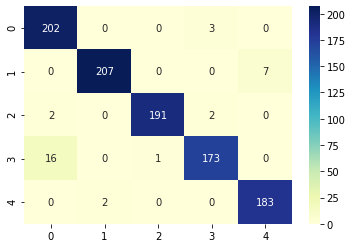

In [12]:
# Confusion Matrix
y_pred_test = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(
    data=cm, 
    # columns=['Actual Positive:1', 'Actual Negative:0'], 
    # index=['Predict Positive:1', 'Predict Negative:0']
)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# Class Predicition Error